# Task 2- Prediction using Unsupervised ML

### By Pratyush Bhatnagar

### Intern at TSF GRIP For March'2021

### Importing required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Importing and reading Dataset from csv file

In [2]:
ds=pd.read_csv('/Users/PRINCE/Downloads/Iris.csv')

### Visualizing Data 

In [3]:
ds.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
ds.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
ds.shape

(150, 6)

In [6]:
ds.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [8]:
ds_setosa=ds.loc[ds['Species']=='Iris-setosa']
ds_virginica=ds.loc[ds['Species']=='Iris-verginica']
ds_versicolor=ds.loc[ds['Species']=='Iris-versicolor']

In [9]:
ds_versicolor.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
50,51,7.0,3.2,4.7,1.4,Iris-versicolor
51,52,6.4,3.2,4.5,1.5,Iris-versicolor
52,53,6.9,3.1,4.9,1.5,Iris-versicolor
53,54,5.5,2.3,4.0,1.3,Iris-versicolor
54,55,6.5,2.8,4.6,1.5,Iris-versicolor


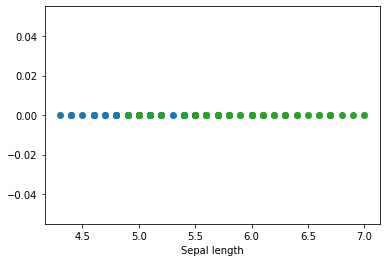

In [10]:
plt.plot(ds_setosa['SepalLengthCm'],np.zeros_like(ds_setosa['SepalLengthCm']),'o')
plt.plot(ds_virginica['SepalLengthCm'],np.zeros_like(ds_virginica['SepalLengthCm']),'o')
plt.plot(ds_versicolor['SepalLengthCm'],np.zeros_like(ds_versicolor['SepalLengthCm']),'o')
plt.xlabel('Sepal length')
plt.show()

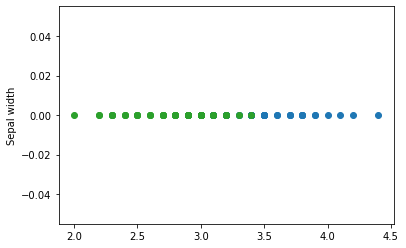

In [12]:
plt.plot(ds_setosa['SepalWidthCm'],np.zeros_like(ds_setosa['SepalWidthCm']),'o')
plt.plot(ds_virginica['SepalWidthCm'],np.zeros_like(ds_virginica['SepalWidthCm']),'o')
plt.plot(ds_versicolor['SepalWidthCm'],np.zeros_like(ds_versicolor['SepalWidthCm']),'o')
plt.ylabel('Sepal width')
plt.show()

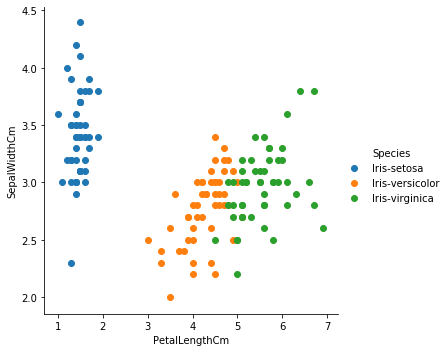

In [13]:
sns.FacetGrid(ds,hue="Species",height=5).map(plt.scatter,"PetalLengthCm","SepalWidthCm").add_legend();
plt.show()

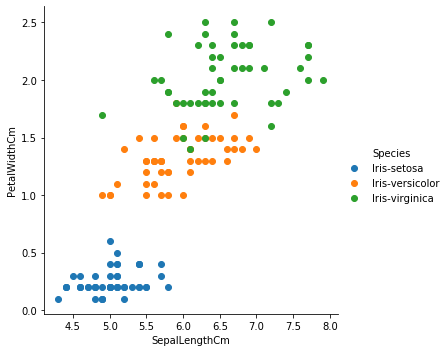

In [14]:
sns.FacetGrid(ds,hue="Species",height=5).map(plt.scatter,"SepalLengthCm","PetalWidthCm").add_legend();
plt.show()

### Applying K-means Clustering on Iris

In [16]:
x = ds.iloc[:, [0, 1, 2, 3]].values
print(x)

[[  1.    5.1   3.5   1.4]
 [  2.    4.9   3.    1.4]
 [  3.    4.7   3.2   1.3]
 [  4.    4.6   3.1   1.5]
 [  5.    5.    3.6   1.4]
 [  6.    5.4   3.9   1.7]
 [  7.    4.6   3.4   1.4]
 [  8.    5.    3.4   1.5]
 [  9.    4.4   2.9   1.4]
 [ 10.    4.9   3.1   1.5]
 [ 11.    5.4   3.7   1.5]
 [ 12.    4.8   3.4   1.6]
 [ 13.    4.8   3.    1.4]
 [ 14.    4.3   3.    1.1]
 [ 15.    5.8   4.    1.2]
 [ 16.    5.7   4.4   1.5]
 [ 17.    5.4   3.9   1.3]
 [ 18.    5.1   3.5   1.4]
 [ 19.    5.7   3.8   1.7]
 [ 20.    5.1   3.8   1.5]
 [ 21.    5.4   3.4   1.7]
 [ 22.    5.1   3.7   1.5]
 [ 23.    4.6   3.6   1. ]
 [ 24.    5.1   3.3   1.7]
 [ 25.    4.8   3.4   1.9]
 [ 26.    5.    3.    1.6]
 [ 27.    5.    3.4   1.6]
 [ 28.    5.2   3.5   1.5]
 [ 29.    5.2   3.4   1.4]
 [ 30.    4.7   3.2   1.6]
 [ 31.    4.8   3.1   1.6]
 [ 32.    5.4   3.4   1.5]
 [ 33.    5.2   4.1   1.5]
 [ 34.    5.5   4.2   1.4]
 [ 35.    4.9   3.1   1.5]
 [ 36.    5.    3.2   1.2]
 [ 37.    5.5   3.5   1.3]
 

In [18]:
from sklearn.cluster import KMeans
arr=[]
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter=300, n_init= 10, random_state=0)
    kmeans.fit(x)
    arr.append(kmeans.inertia_)

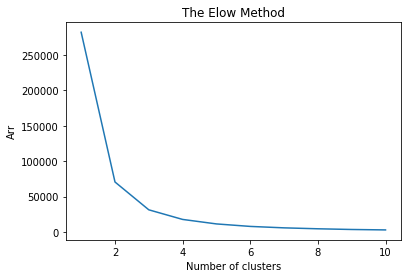

In [19]:
plt.plot(range(1,11),arr)
plt.title('The Elow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Arr')
plt.show()

In [20]:
kmeans = KMeans(n_clusters = 3, init='k-means++', max_iter = 300, n_init = 10, random_state=0)
y_kmeans = kmeans.fit_predict(x)

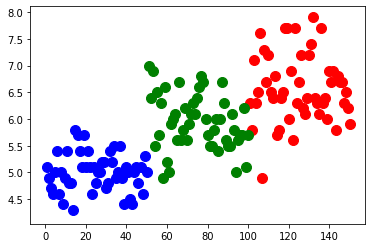

In [21]:
plt.scatter(x[y_kmeans == 0,0], x[y_kmeans == 0,1],
           s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1,0], x[y_kmeans == 1,1],
           s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2,0], x[y_kmeans == 2,1],
           s = 100, c = 'green', label = 'Iris-virginica')

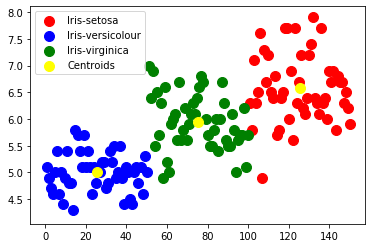

In [22]:
plt.scatter(x[y_kmeans == 0,0], x[y_kmeans == 0,1],
           s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1,0], x[y_kmeans == 1,1],
           s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2,0], x[y_kmeans == 2,1],
           s = 100, c = 'green', label = 'Iris-virginica')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()